The first cell simply installs the requirements for the code below. If you aren't sure if the dependencies
have already bene installed you can run this cell again safely. You will see the message "Requirement already
satisfied" if the packages are already installed.

In [1]:
import sys
!{sys.executable} -m pip install coba
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install vowpalwabbit

The next cell creates a benchmark and evaluates a collection of learners on it. The results of this evaluation are used in the rest of this notebook so you should run this cell first. If you've already executed this cell once it will restore the results from file and you will not actually see any output upon execution.

In [2]:
from coba.learners import RandomLearner, EpsilonBanditLearner, VowpalLearner, UcbBanditLearner, CorralLearner
from coba.benchmarks import Benchmark

#Create our benchmark from a configuration file
benchmark = Benchmark.from_file("bakeoff_short.json")

#Define the learners that we want to evaluate
learners = [
    RandomLearner(),
    UcbBanditLearner(),
    EpsilonBanditLearner(epsilon=0.025),
    VowpalLearner(bag=5, seed=10),      #This learner requires that VowpalWabbit be installed
    VowpalLearner(epsilon=.1, seed=10), #This learner requires that VowpalWabbit be installed
    CorralLearner([VowpalLearner(bag=5, seed=10), VowpalLearner(epsilon=.1, seed=10)], eta=.075, T=300, seed=10),
]

#Use our benchmark to evaluate our learners. The log file is where results will stored/restored on evaluation.
result = benchmark.evaluate(learners, "bakeoff_short.log", seed=10)

2021-05-29 19:14:08 Processing group...
2021-05-29 19:14:08   * Creating source 0 from {"OpenmlSimulation":3}... (0.06 seconds)
2021-05-29 19:14:08   * Creating simulation 0 from source 0... (0.0 seconds)
2021-05-29 19:14:08   * Evaluating learner 0 on Simulation 0... (0.0 seconds)
2021-05-29 19:14:08   * Creating simulation 0 from source 0... (0.0 seconds)
2021-05-29 19:14:08   * Evaluating learner 1 on Simulation 0... (0.02 seconds)
2021-05-29 19:14:08   * Creating simulation 0 from source 0... (0.0 seconds)
2021-05-29 19:14:08   * Evaluating learner 2 on Simulation 0... (0.01 seconds)
2021-05-29 19:14:08   * Creating simulation 0 from source 0... (0.0 seconds)
2021-05-29 19:14:08   * Evaluating learner 3 on Simulation 0... (0.06 seconds)
2021-05-29 19:14:08   * Creating simulation 0 from source 0... (0.0 seconds)
2021-05-29 19:14:08   * Evaluating learner 4 on Simulation 0... (0.07 seconds)
2021-05-29 19:14:08   * Creating simulation 0 from source 0... (0.0 seconds)
2021-05-29 19:14

2021-05-29 19:14:12   * Evaluating learner 3 on Simulation 8... (0.2 seconds)
2021-05-29 19:14:12   * Creating simulation 8 from source 1... (0.02 seconds)
2021-05-29 19:14:12   * Evaluating learner 4 on Simulation 8... (0.13 seconds)
2021-05-29 19:14:12   * Creating simulation 8 from source 1... (0.02 seconds)
2021-05-29 19:14:12   * Evaluating learner 5 on Simulation 8... (0.29 seconds)
2021-05-29 19:14:12   * Creating simulation 9 from source 1... (0.02 seconds)
2021-05-29 19:14:12   * Evaluating learner 0 on Simulation 9... (0.0 seconds)
2021-05-29 19:14:12   * Creating simulation 9 from source 1... (0.03 seconds)
2021-05-29 19:14:12   * Evaluating learner 1 on Simulation 9... (0.02 seconds)
2021-05-29 19:14:12   * Creating simulation 9 from source 1... (0.02 seconds)
2021-05-29 19:14:12   * Evaluating learner 2 on Simulation 9... (0.02 seconds)
2021-05-29 19:14:12   * Creating simulation 9 from source 1... (0.03 seconds)
2021-05-29 19:14:13   * Evaluating learner 3 on Simulation 9

2021-05-29 19:14:16   * Evaluating learner 1 on Simulation 17... (0.01 seconds)
2021-05-29 19:14:16   * Creating simulation 17 from source 2... (0.0 seconds)
2021-05-29 19:14:16   * Evaluating learner 2 on Simulation 17... (0.01 seconds)
2021-05-29 19:14:16   * Creating simulation 17 from source 2... (0.0 seconds)
2021-05-29 19:14:16   * Evaluating learner 3 on Simulation 17... (0.05 seconds)
2021-05-29 19:14:16   * Creating simulation 17 from source 2... (0.0 seconds)
2021-05-29 19:14:16   * Evaluating learner 4 on Simulation 17... (0.04 seconds)
2021-05-29 19:14:16   * Creating simulation 17 from source 2... (0.0 seconds)
2021-05-29 19:14:16   * Evaluating learner 5 on Simulation 17... (0.1 seconds)


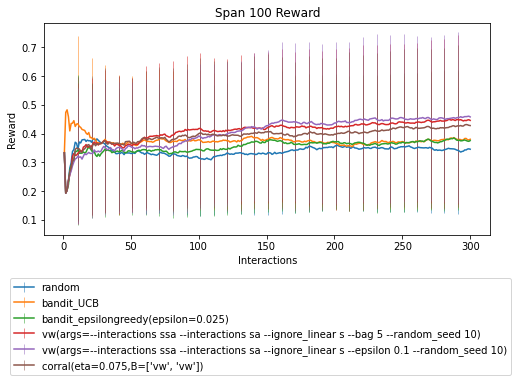

In [4]:
#We can create a quick summary plot to get a sense of how the results looked
#For more in-depth analysis it is useful to load the result into a Jupyter Notebook
result.plot_learners(span=100)

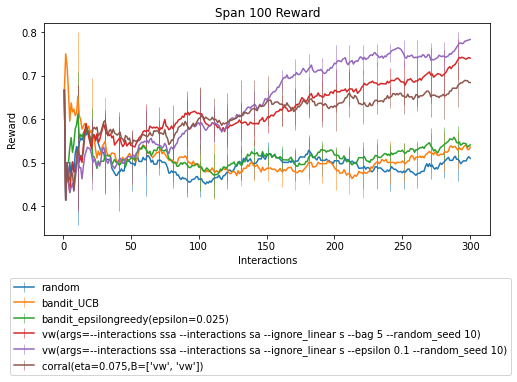

In [5]:
#We can zoom in on one simulation source to see how each learner performs on it
result.plot_learners(source_matches=[3], span=100)

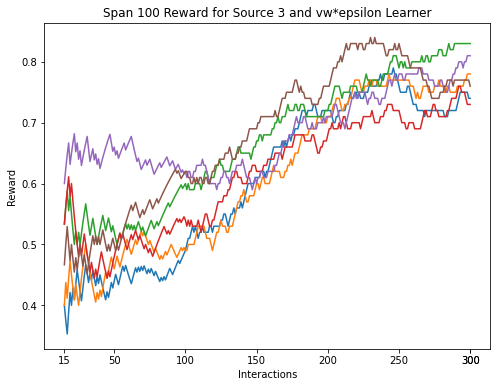

In [6]:
#Finally we can zoom in on one simulation source and one learner to see performance over several shuffles
result.plot_shuffles(3, 'vw*epsilon', span=100) #This line requires that Matplotlib be installed